In [64]:
import numpy as np
import torch
import imageio
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
vis_path_nerv = '/home/haian/research/TensoRFactor/temp_result/test_000/nerv/visibility_from_density.npy'
vis_path_nerfactor = '/home/haian/research/TensoRFactor/temp_result/test_000/nerfactor/visibility_from_density.npy'
mask_path = '/home/haian/research/TensoRFactor/temp_result/test_000/acc.png'

visibility_nerv = np.load(vis_path_nerv)
visibility_nerfactor = np.load(vis_path_nerfactor)
mask = imageio.imread(mask_path)

/tmp/ipykernel_2207339/2129430686.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(mask_path)


In [65]:
visibility_nerv = visibility_nerv.transpose(1, 2, 0, 3)
visibility_nerfactor = visibility_nerfactor.transpose(1, 2, 0, 3)

mask_visibility_nerv = visibility_nerv[mask > 0, :, :].reshape(-1)
mask_visibility_nerfactor = visibility_nerfactor[mask > 0, :, :].reshape(-1)

valid_num = mask_visibility_nerv.shape[0]


In [70]:
slot_num = 50
slot = np.linspace(0, 1, slot_num + 1)
num_nerv_list = []
portion_nerv_list = []
num_nerfactor_list = []
portion_nerfactor_list = []
# print(slot)
for i in range(slot_num):
    min = slot[i]
    max = slot[i + 1]
    num_nerv = ((mask_visibility_nerv >= min) & (mask_visibility_nerv <= max)).sum()
    portion_nerv = num_nerv / valid_num
    num_nerfactor = ((mask_visibility_nerfactor >= min) & (mask_visibility_nerfactor <= max)).sum()
    portion_nerfactor = num_nerfactor / valid_num

    num_nerv_list.append(num_nerv)
    portion_nerv_list.append(portion_nerv)

    num_nerfactor_list.append(num_nerfactor)
    portion_nerfactor_list.append(portion_nerfactor)
print('total', valid_num)


nerv_accuracy = portion_nerv_list[0] + portion_nerv_list[-1]
nerfactor_accuracy = portion_nerfactor_list[0] + portion_nerfactor_list[-1]
print(portion_nerv_list)
print(portion_nerfactor)
print('nerv accuracy', nerv_accuracy)
print('nerfactor accuracy', nerfactor_accuracy)


total 65782528
[0.23188739417250734, 0.00602322549841806, 0.0043480846464276956, 0.0036571565021034157, 0.0031186396485097076, 0.0027049887775671983, 0.0023810121739316556, 0.0021252603730887326, 0.001948131272790246, 0.0017930444995972183, 0.0017075658752427393, 0.0016166450763339469, 0.0015312880648186704, 0.0014258953380447768, 0.00132082184497379, 0.0012307523359394155, 0.0011800245803870596, 0.001127244608173161, 0.0010847257192669762, 0.001050218076143258, 0.0010160904731420478, 0.0009867665772893375, 0.0009662444106739102, 0.0009651194919112868, 0.0009627176383370369, 0.0009754413816386016, 0.0009630064688301429, 0.000978192872125559, 0.00099889745799979, 0.0010406258634511583, 0.0010748902808964715, 0.0011354686764242323, 0.0011999082795966735, 0.0012581912327844864, 0.0013416632452921237, 0.0014385278717169397, 0.0015910455736818142, 0.0018208178317500963, 0.002075414310620595, 0.002322698817534042, 0.002590627103902118, 0.00300439958768383, 0.003349810454228819, 0.00378574687

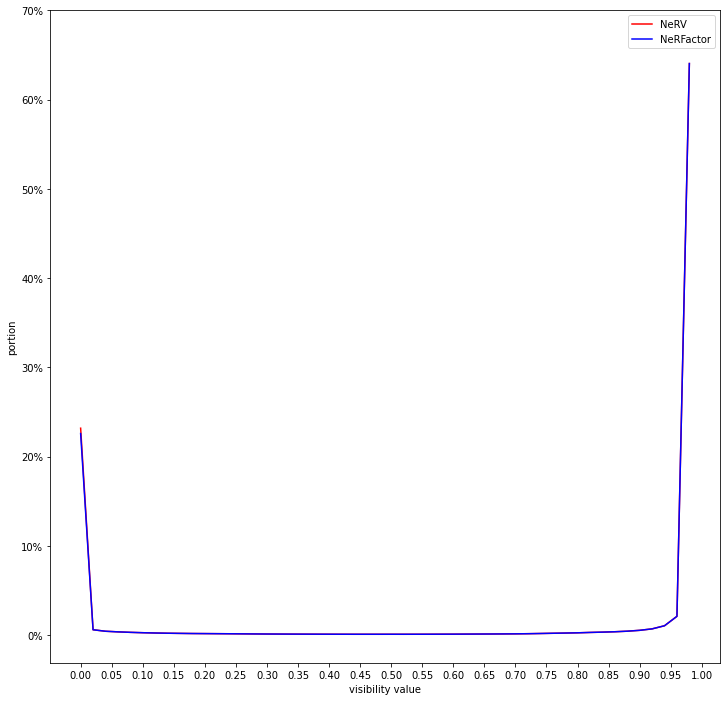

In [68]:
plt.figure(figsize=(12,12))
plt.xlabel('visibility value')
plt.ylabel('portion')

plt.plot(slot[:-1], portion_nerv_list, color='red', label='NeRV')
plt.plot(slot[:-1], portion_nerfactor_list, color='blue',label='NeRFactor')

plt.xticks(np.linspace(0, 1, 21))
plt.yticks(np.linspace(0, 0.7, 8))

def to_percent(temp, position):
  return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.legend()
plt.show()
plt.savefig('visibility_portion.png')